# Linear Regression Analysis.
## Introduction

In this notebook, we will perform a linear regression analysis using a dataset from Kaggle. We will use simple linear regression where the input variables do not exceed  Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables. We will walk through the entire process, from data exploration to model evaluation.
This project uses a data set found in kaggle: https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression/

  The linear regression model can be expressed as:
### 1. Model Equation
$$
f(x) = W*X + b
$$
Where:
 - b(bias) is the y-intercept of the line.
 - w (weight) represents the slope of the line, indicating the change in f(x) for a one-unit change in x.
 <!-- - ϵ is the error term, representing the difference between the actual and predicted values. -->
   
The equation above is derived from the equation of a straight line:
$$
Y = mx+c
$$
The linear regression model can also be expressed as:

$$
Y = \beta_0 + \beta_1 X + \epsilon
$$
where:
 - Y is the dependent variable (response variable)
 - X is the independent variable (predictor variable).
 - $\beta_0$ is the intercept (the value of YY when XX is zero). 
 - $\beta_1$ is the slope (the change in YY for a one-unit change in XX).
 - $\epsilon$ is the error term (residuals).
### 2. Objective

The objective of fitting a linear regression model is to estimate the parameters \( $\beta_0$ \) and \( $\beta_1$ \) such that the sum of the squared residuals is minimized. This can be expressed as:

$$
\text{Minimize } \sum_{i=1}^{n} (Y_i - (\beta_0 + \beta_1 X_i))^2
$$

where:
- \( $Y_i$ \) are the observed values.
- \( $X_i$ \) are the predictor values.
- \( $n$ \) is the number of observations.

### 3. R-Squared

The goodness-of-fit of the model is often evaluated using \( R^2 \), which is given by:

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2}{\sum_{i=1}^{n} (Y_i - \bar{Y})^2}
$$

where:
- \( $\hat{Y}_i$ \) are the predicted values from the model.
- \( $\bar{Y}$ \) is the mean of the observed values.

### 1 Importing the libraries.

In [27]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#### 1.1 Data Importation.

In [9]:
#reading the data.
df=pd.read_csv('Salary_dataset.csv')
df.head() # we want to see the first five rows of the data to get a sense of what the data actually looks like

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


From the data we actually see that they are continuos values and thus Linear regression can be applied to the problem to predict salaries.
- It is worth noting that linear regression is useful in areas you suspect that the input variable X affects y, i.e when there is a linear relationship.
Let's go ahead and check for missing values if any we can try and impute/ fill the data.
We do this by using .info() method

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


The data was from kaggle and probably was preprocessed and the missing values filled out so as expected we don't have any missing values.
Let's go ahead and visualise the data to get a better understanding of how it actually looks like.
- we use seaborn to plot the data with a regression line.

#### 1.2 Visualising the data.

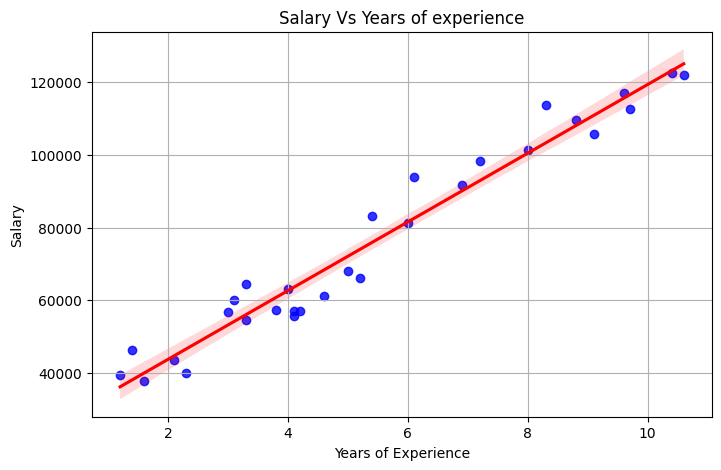

In [7]:
# plt.figure(figuresize=(9,9))
plt.figure(figsize=(8, 5))
sns.regplot(x="YearsExperience", y="Salary", data=df, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title("Salary Vs Years of experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.grid(True)
plt.show()

### Pre-processing

- This is a crucial step where we:
    - Clean our data and handle missing values.
    - Transform our data
       - Normalization/Standardization: Scale numerical features so they have a similar range. Normalization (scaling to a range, e.g., 0 to 1) and standardization (scaling to have mean 0 and variance 1) are common methods.
        - Encoding Categorical Variables: Convert categorical data into numerical format using techniques like one-hot encoding, label encoding, or ordinal encoding.
        - Feature Engineering: Create new features from existing data that might be more useful for the model. This could include polynomial features, interaction terms, or domain-specific features.
    - Data Integration
        - Merging Datasets: Combine data from multiple sources or tables into a single cohesive dataset, ensuring that related data points are aligned properly.
        - Data Aggregation: Summarize data by grouping and aggregating it to reduce dimensionality and highlight key trends.
    - Feature Selection:
        - Selecting Relevant Features: Identify and keep only the most relevant features for the model. This can be done through methods like correlation analysis, feature importance scores, or dimensionality reduction techniques.
        - Dimensionality Reduction: Reduce the number of features while retaining essential information. Techniques like Principal Component Analysis (PCA) or Linear Discriminant Analysis (LDA) are often used.
      - Data Splitting
  - Training and Testing Sets:
    - Divide the dataset into training and testing sets to evaluate the model’s performance. Common splits are 70-30 or 80-20.`
    - Cross-Validation: Use techniques like k-fold cross-validation to ensure that the model generalizes well and to prevent overfitting.
  - Handling Imbalanced Data
     - Resampling Techniques: Address imbalanced datasets by using techniques such as oversampling the minority class (e.g., SMOTE), undersampling the majority class, or using class weights.
  - Feature Scaling
      - Scaling: Ensure features are on the same scale to avoid bias towards features with larger ranges. This includes standardizing or normalizing features.

In [24]:
#Feature selection.
X = df['YearsExperience'].values.reshape(-1,1)
y=df["Salary"]

#spliting the data
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42, test_size=0.2)

# initialising the Pipeline with our model and the scaler
pipeline = Pipeline([
    ("scaler", StandardScaler()), #Applying standardization to the data to make sure they all have the same weight.
    ("model", LinearRegression()) # Applying our model.
])
#fitting our model.
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [25]:
#evaluating the model performance.
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')

Mean Squared Error: 49830096.85590836


In [28]:
# Assuming y_test and y_pred are your true and predicted values
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 49830096.85590836
Root Mean Squared Error: 7059.043621901507
Mean Absolute Error: 6286.453830757742
R-squared: 0.9024461774180498
